<a href="https://colab.research.google.com/github/Benjaminfoley/-ritual-practice0N/blob/main/CS_325_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
<Benjamin Foley>
<foleybe@oregonstate.edu>
Programming Exercise 1
CS 325 Algorithms Winter 2021
```





---


**Part Zero**: Front matter and helper functions

Read over this code. You should not make any changes.


---



In [1]:
# import libraries
import time 
from numpy.random import seed 
from numpy.random import randint 
import matplotlib.pyplot as plt

In [2]:
# GLOBAL VARIABLES

# lists to store functions and their names (string)
f_list = []
f_name_list = []

In [3]:
# DATA GENERATION

# function to generate a random list
def random_list(max):
  return randint(0, max, max) 
  
# function to generate a semi-sorted list
def semisorted_list(max):
  last = 0
  lst = []
  for i in range(max):
    cur = randint(-1,5) + last
    lst.append(cur)
    last = cur
  return lst
  
# function to generate a sorted list
def sorted_list(max):
  return list(range(0, max))
 
# function to generate a backwards sorted list
def reversed_list(max):
  lst = list(range(0, max))
  lst.reverse()
  return lst  

In [4]:
# EXPERIMENT AND GRAPHING

# function that runs a set of functions, times their output, and
#    graphs time vs input size
def time_algorithms(data_f, fs, fnames, experiment):
  if len(fs)!=len(fnames):
    print("Error: functions and name lists must be the same size!")
    return;
  
  fcount = 0
  # initialize graph
  fig, ax1 = plt.subplots()
  ax1.set_title(experiment)
  ax1.set_xlabel('n') 
  ax1.set_ylabel('time (s)')
  
  # for each sorting algorithm
  for f in fs:
    # randomly generates list of different sizes
    elements = list() 
    times = list() 
    # run 10 iterations of the experiment
    for i in range(1, 11): 

        # generate some data
        lst = data_f(50 * i)

        # run the algorithm and time it
        start = time.clock() 
        f(lst) 
        end = time.clock() 

        # save results for graphing
        elements.append(len(lst)) 
        times.append(end-start) 

    # graph the complexity
    ax1.plot(elements, times, label = fnames[fcount])      
    fcount = fcount + 1
    
  # display the graph
  ax1.grid() 
  ax1.legend() 
  fig.show() 



---


**Part One**: Implement sorting algorithms

For each of the following sorting algorithms, complete the code. It is recommended that you consult the pseudocode on Wikipedia for each algorithm.

You may write additional helper functions where necessary. Comment your code!


---



**Exercise 1: Insertion Sort**

Implement insertion sort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Insertion_sort)


In [5]:
# implementation of insertion sort
def insertion_sort(lst):
  for i in range(1,len(lst)):   #Traverse 1-lst
    key = lst[i]
    j = i-1
    while j >= 0 and key < lst[j]:          #This moves the elements that are less then key to position 1 ahead
      lst[j+1] = lst[j]
      j=j-1
    lst[j+1] = key
  return lst 
          
  # add the function to the function list        
  f_list.append(insertion_sort)
  f_name_list.append("Insertion Sort")        

**Exercise 2: Selection Sort**

Implement selection sort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Selection_sort)



In [6]:
# implementation of selection sort
def selection_sort(lst):
  for i in range(len(lst)):         #Traverse through the array
    min_value = i
    for j in range(i+1,len(lst)):     #Find the minimum value in the array
      if lst[min_value] > lst[j]:
        min_value = j
    lst[i], lst[min_value]= lst[min_value],lst[i]       #Swap the minimum value with the first value
  return lst
                 
# add the function to the function list        
f_list.append(selection_sort)
f_name_list.append("Selection Sort")                  

**Exercise 3: Quicksort**

Implement quicksort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Quicksort). 

In [7]:
def quicksort(lst, low = 0, high = None):
  if high == None:
    high = len(lst) - 1   #default values
  if len(lst) == 1:       #if length is 1 its already sorted
    return lst
  if low < high:          
    p = partition(lst, low, high)
    quicksort(lst, low, p - 1)
    quicksort(lst, p + 1, high)
  return lst

def partition(lst, low, high): #partition helper function
  pivot = low                  #selects first value as pivot
  i = low + 1
  for j in range(low + 1, high + 1): 
    if lst[j] < lst[pivot]:    #if current element is smaller than pivot location
      lst[i], lst[j] = lst[j], lst[i] #swap
      i += 1
  lst[pivot], lst[i - 1] = lst[i - 1], lst[pivot] #finally, swap pivot
  return i - 1


  
# add the function to the function list  
f_list.append(quicksort)
f_name_list.append("Quicksort")


**Exercise 4: Mergesort**

Implement mergesort based on pseudocode from textbook or [Wikipedia](https://en.wikipedia.org/wiki/Merge_sort).

In [8]:
def mergesort(lst):
    if len(lst) <= 1: #if length is 1 array is sorted
        return lst
    mid = len(lst) // 2 #halve array
    left = mergesort(lst[:mid]) #recursively halve left half
    right = mergesort(lst[mid:]) #recursive fairy for right half
    return merge(left, right, lst.copy()) #call merge function to sort and 
                                          #put them back together

def merge(left, right, merged):
    left_index = 0
    right_index = 0  #initialze index values
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged[left_index + right_index] = left[left_index]
            left_index += 1 #sort value into appropriate location and increment
        else:
            merged[left_index + right_index] = right[right_index]
            right_index += 1
    for left_index in range(left_index, len(left)): # fill in leftover in
        merged[left_index + right_index] = left[left_index] #the correct spot
    for right_index in range(right_index, len(right)):
        merged[left_index + right_index] = right[right_index]
    return merged

  
# add the function to the function list  
f_list.append(mergesort)
f_name_list.append("Mergesort")  

**Exercise 5: Pick a Sorting Algorithm**

Choose a sorting algorithm from this list on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm) and implement it.

You may not repeat variants of any of the above sorting algorithms. You may not choose Bubblesort nor Bogosort.

In [9]:
def gap_InsertionSort(lst,start,gap):
    for i in range(start+gap,len(lst),gap):
        current_value = lst[i]
        position = i
        while position>=gap and lst[position-gap]>current_value:
            lst[position]=lst[position-gap]
            position = position-gap
        lst[position]=current_value
def shellSort(lst):
    sublistcount = len(lst)//2
    while sublistcount > 0:
      for start_position in range(sublistcount):
        gap_InsertionSort(lst, start_position, sublistcount)
      sublistcount = sublistcount // 2

    
# update the variable and algorithm name below  
# add the function to the function list  
f_list.append(shellSort)
f_name_list.append("Shell sort")

In [10]:
import random
 
def bucketSort(lst):
    biggest = max(lst)
    length = len(lst)
    size = biggest/length
    buckets = [[] for i in range(length)]  # Create Buckets  

    for i in range(length):     # Bucket Sorting 
        index = int(lst[i]/size)
        if index != length:
            buckets[index].append(lst[i])
        else:
            buckets[length - 1].append(lst[i])  

    for i in range(len(lst)):         # Sorting Individual Buckets
        buckets[i] = sorted(buckets[i])
 
    result = []         # Flattening the lst
    for i in range(length):
        result = result + buckets[i]
             
    return result
# add the function to the function list  
f_list.append(bucketSort)
f_name_list.append("Bucketsort")  

**EXTRA CREDIT**

Add a code block below and implement another sorting algorithm that either:
1.   has complexity O(n log n) or better for the average case, or 
2.   from the list non-comparison sorts on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm#Non-comparison_sorts)



Remember to add the function to the function list so that it will be graphed.

Your extra credit sorting algorithm is worth \[+5 Points]. Detailed comments are expected for full credit.



---


**Part Two**: Experimental Analysis

In this section, you do not have to write any more code. You will test your sorting algorithms above to understand each algorithm's respective behavior under different conditions.

Below are four code blocks. Each will run your sorting algorithms on a different set of data and produce a graph of time vs. input size. Run each block several times to observe the consistant behavior of each sorting algorithm (despite variances of individual trials). 

Below each output, you will write a short paragraph discussing your results.


---







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


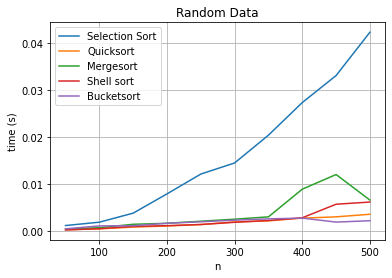

In [11]:
# run the sorting algorithms on random data
time_algorithms(random_list, f_list, f_name_list, 'Random Data')


**Analysis A: Sorting a Random List**

From what we can see on the graph it seems when the data is randomized certain sorting algorthims excel and others do not. From the graph we can see that selection sort is time complexity is much higher than any others. This is because selection sort finds the smallest value and relocates it to the front. This means it still has to go through the whole list even if it found the smallest value.It surprised me how well bucketsort did. I thought the list of non-comparison sorts would be slower. It caught my eye that the worst case is n^2 +k I thought that this would make it closer to merge or even selection sort. I noticed a trend when running several times that the quick, shell, and bucket were all very similar in time complexity. Merge sort was almost alwasy right above the trio, and sometimes in line with them. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


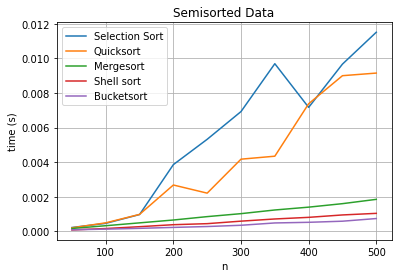

In [12]:
# run the sorting algorithms on data that is nearly sorted
time_algorithms(semisorted_list, f_list, f_name_list, 'Semisorted Data')


**Analysis B: Almost-Sorted List**

When the list was semi sorted we saw a drastic change in the data. The time for every sorting algorthim went down considerably. With the outlier of the selection sort, when the list is randomized, we saw that quicksort has joined the selection sort in being the second biggest time complexity. The time is still very fast being at .01 seconds, but to see the quicksort make a jump suprised me, I thought that merge sort would take the jump with selection. From before we can see that shell, bucket and merge are all the fastest options. however I would keep an eye on shell and bucket because they are the fastest in randomized and semi-sorted. When I was going through the attempts I did notice some outliers. There was one that bumped selection sort all the way up to .2 seconds. Other than that there wasn't any other huge outliers that caught my eye.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


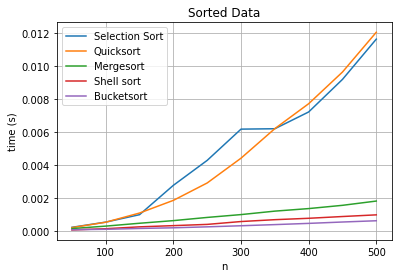

In [13]:
# run the sorting algorithms on already sorted data
time_algorithms(sorted_list, f_list, f_name_list, 'Sorted Data')


**Analysis C: Sorted List**

For the already sorted list we had about the same data as with the semi-sorted list. It looked like the quicksort has taken the lead as the slowest algorithm. it was slower about 90% of the attempts I tried. When I saw this I looked more into the actual design of the quick sort becasue I had the impression that it was one of the fastest sorting algorithms. Then I found that there are multiple way to implement the sorting algorthm. Since the quicksort chooses the pivot point there are different ways to implement it. When the algorthim chooses to picks the smallest or the largest value. This will lead to the algorthim getting a big O of n^2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


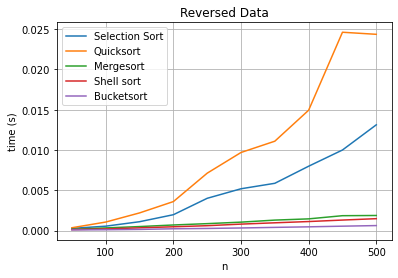

In [14]:
# run the sorting algorithms on data perfectly reversed
time_algorithms(reversed_list, f_list, f_name_list, 'Reversed Data')


**Analysis D: Reversed List**

For the reversed list scenario we saw the same as we have been seing for the other attempts. Little has changed except the time has double for quick sort and the time increased for selection sort. little shocked me after the shift in the quicksort taking the slowest spot on the list. I did think it was funny to see merge, shell, and bucket all under .0025 seconds even when the list was reversed. They were near the bottom of the graph nearly every time. This leads me to believe that these are some of the best sorting algorthims. They might be more difficult to implement but the work pays off. 
